# Análisis del Sistema de Lorenz – Persona 3

Este notebook aborda la tercera parte del Proyecto II de Análisis Numérico: el análisis teórico del sistema de Lorenz. Se estudian sus puntos fijos, la divergencia del campo vectorial, la evolución del volumen en el espacio de fase, y se interpreta geométricamente el comportamiento del sistema desde un punto de vista dinámico.


## 1. Puntos fijos

Los puntos fijos del sistema de Lorenz se obtienen resolviendo la siguiente condición:

$$
\dot{x} = \dot{y} = \dot{z} = 0 \Rightarrow
\begin{cases}
\sigma(y - x) = 0 \\
x(\rho - z) - y = 0 \\
xy - \beta z = 0
\end{cases}
$$

De donde se deduce que existen tres puntos fijos:

$$
\begin{aligned}
P_0 &= (0, 0, 0) \\
P_\pm &= \left( \pm \sqrt{\beta(\rho - 1)}, \pm \sqrt{\beta(\rho - 1)}, \rho - 1 \right)
\end{aligned}
$$



In [ ]:

from math import sqrt

def puntos_fijos(rho, beta):
    x_eq = sqrt(beta * (rho - 1))
    return [
        (0.0, 0.0, 0.0),
        (x_eq, x_eq, rho - 1),
        (-x_eq, -x_eq, rho - 1)
    ]

rho, beta = 28, 8/3
p_fijos = puntos_fijos(rho, beta)
for i, p in enumerate(p_fijos):
    print(f"Punto fijo {i}: x = {p[0]:.4f}, y = {p[1]:.4f}, z = {p[2]:.4f}")


Punto fijo 0: x = 0.0000, y = 0.0000, z = 0.0000
Punto fijo 1: x = 8.4853, y = 8.4853, z = 27.0000
Punto fijo 2: x = -8.4853, y = -8.4853, z = 27.0000


###¿Cómo se comportan los puntos fijos?

Una vez obtenidos los puntos fijos del sistema de Lorenz:

- \( P_0 = (0, 0, 0) \)

- Los otros dos puntos fijos son:

$$
P_{\pm} = \left( \pm \sqrt{\beta(\rho - 1)},\ \pm \sqrt{\beta(\rho - 1)},\ \rho - 1 \right)
$$

Podemos analizarlos linealizando el sistema alrededor de cada punto (análisis de estabilidad con la matriz Jacobiana).


---

####Punto A: \( P_0 = (0, 0, 0) \)

La matriz Jacobiana del sistema evaluada en \( P_0 \) tiene autovalores reales con signo mixto (para \( \rho > 1 \)).

Esto implica que el punto es **inestable tipo silla**.  
Las trayectorias divergen de este punto en al menos una dirección.

---

###Punto B: puntos $P_{\pm}$

Los dos puntos fijos simétricos están dados por:

$$
P_{\pm} = \left( \pm \sqrt{\beta(\rho - 1)},\ \pm \sqrt{\beta(\rho - 1)},\ \rho - 1 \right)
$$

- Para $ \rho > \rho_c \approx 24.74 $, estos puntos se vuelven **inestables**, y el sistema comienza a exhibir **dinámica caótica**.

- Para $ \rho < \rho_c $, este punto puede actuar como **atractor local**, pero no global.



---

####Punto C: $ P_- = \left( -\sqrt{\beta(\rho - 1)},\ -\sqrt{\beta(\rho - 1)},\ \rho - 1 \right) $

Este punto es simétrico a \( P_+ \), con el mismo comportamiento dinámico:

- Es **inestable** cuando $ \rho > \rho_c $.
- Puede ser **atractor local** cuando $ \rho < \rho_c $.

---

>**Resumen:**  
Los tres puntos fijos juegan un rol central en la dinámica del sistema de Lorenz. A medida que el parámetro $ \rho $ cruza ciertos umbrales, el sistema pasa de estabilidad a caos. Estos puntos marcan transiciones clave y ayudan a entender cómo surgen estructuras atractoras en el espacio de fase.


## 2. Divergencia del campo vectorial

El campo vectorial del sistema de Lorenz es:

$$
\vec{F}(x, y, z) =
\begin{pmatrix}
\sigma (y - x) \\
x(\rho - z) - y \\
xy - \beta z
\end{pmatrix}
$$

La divergencia se calcula como:

$$
\nabla \cdot \vec{F} =
\frac{\partial F_x}{\partial x} +
\frac{\partial F_y}{\partial y} +
\frac{\partial F_z}{\partial z}
= -\sigma - 1 - \beta
$$


In [ ]:

def divergencia_lorenz(sigma, beta):
    return -sigma - 1 - beta

sigma = 10
div = divergencia_lorenz(sigma, beta)
print(f"Divergencia del campo vectorial: {div:.4f}")


Divergencia del campo vectorial: -13.6667


## 2.1. Interpretación geométrica

Dado que la divergencia es negativa constante, el sistema de Lorenz es un **sistema disipativo**. Esto significa que las trayectorias en el espacio de fase tienden a comprimirse en un volumen cada vez menor con el tiempo.

La contracción del volumen en el espacio tridimensional se relaciona con la aparición de un atractor extraño: un conjunto hacia el cual convergen las trayectorias del sistema a pesar de la sensibilidad a condiciones iniciales.

Este comportamiento es característico de los **sistemas dinámicos caóticos**.


## 3. Integral de flujo en el espacio de fase

El espacio de fase del sistema de Lorenz está definido por las variables \( (x, y, z) \), y puede analizarse en términos de un volumen dinámico \( V(t) \) limitado por una superficie \( S(t) \). La tasa de cambio del volumen está dada por la **integral de flujo** sobre dicha superficie:

$$
\frac{dV(t)}{dt} = \iint_{S(t)} \vec{F} \cdot d\vec{S}
$$

donde \( \vec{F} \) es el campo vectorial del sistema de Lorenz, y \( d\vec{S} \) es el vector normal a la superficie \( S(t) \).

Aplicando el **teorema de la divergencia (Gauss)**, la integral de flujo se puede reescribir como una integral sobre el volumen:

$$
\frac{dV(t)}{dt} = \iiint_{V(t)} \nabla \cdot \vec{F} \, dV
$$

Dado que en el sistema de Lorenz la divergencia es constante y negativa:

$$
\nabla \cdot \vec{F} = -(\sigma + 1 + \beta)
$$

se puede extraer de la integral:

$$
\frac{dV(t)}{dt} = -(\sigma + 1 + \beta) \cdot V(t)
$$

Esto lleva directamente a una **ecuación diferencial ordinaria** para el volumen.


## 4. Resolución de la ecuación diferencial para \( V(t) \) y análisis

La ecuación diferencial obtenida en el paso anterior es de la forma:

$$
\frac{dV(t)}{dt} = -\lambda \cdot V(t), \quad \text{donde } \lambda = \sigma + 1 + \beta
$$

Se trata de una EDO de primer orden con solución:

$$
V(t) = V_0 \cdot e^{-\lambda t}
$$

### ¿Cómo cambia el volumen con respecto al tiempo?

La solución muestra que el volumen del espacio de fase **disminuye exponencialmente** con el tiempo. Esto implica que, aunque las trayectorias del sistema divergen unas de otras debido a la sensibilidad a condiciones iniciales, **todas permanecen confinadas dentro de una región que colapsa hacia un atractor**.

Este comportamiento se traduce en una evolución no conservativa: el sistema **pierde volumen en el espacio de fase**, lo que confirma que es **disipativo**. Las soluciones no llenan todo el espacio tridimensional, sino que se agrupan en una subestructura de menor dimensión (el atractor de Lorenz), donde se concentra la dinámica del sistema a largo plazo.


## 4.1. Evolución del volumen \(V(t)\) en el espacio de fase

La ecuación que rige la evolución del volumen de una región del espacio de fase es:

$$
\frac{dV(t)}{dt} = \nabla \cdot \vec{F} \cdot V(t) \Rightarrow V(t) = V_0 \cdot e^{-(\sigma + 1 + \beta)t}
$$

Esto implica que el volumen decrece **exponencialmente** en el tiempo, lo que confirma que el sistema converge hacia una estructura atractora de menor dimensión.


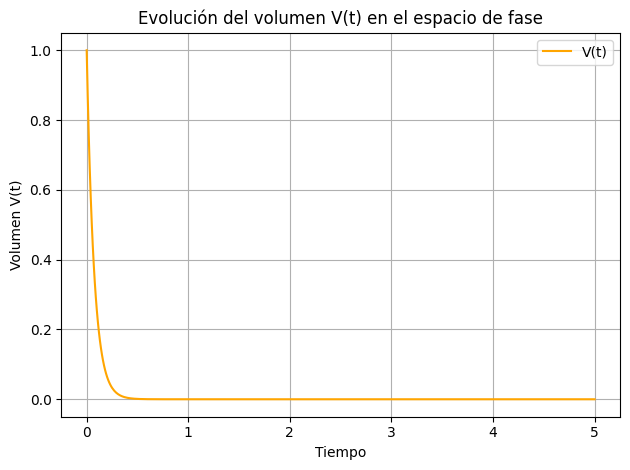

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def volumen_vs_t(t, V0, sigma, beta):
    lam = sigma + 1 + beta
    return V0 * np.exp(-lam * t)

V0 = 1
t = np.linspace(0, 5, 500)
V = volumen_vs_t(t, V0, sigma, beta)

plt.plot(t, V, label='V(t)', color='orange')
plt.title("Evolución del volumen V(t) en el espacio de fase")
plt.xlabel("Tiempo")
plt.ylabel("Volumen V(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### ¿Justifique y analice cómo cambia el volumen?

El volumen \( V(t) \) en el espacio de fase disminuye según la ecuación:

$$
V(t) = V_0 \cdot e^{-(\sigma + 1 + \beta)t}
$$

Esto significa que el sistema **pierde volumen en el espacio de fase**, lo cual indica que **no es conservativo**. Esta propiedad se asocia con sistemas **disipativos**, en los que la energía o volumen se disipa con el tiempo.

Aunque las trayectorias divergen debido a la sensibilidad a las condiciones iniciales, **todas se colapsan hacia una región finita del espacio**: el **atractor de Lorenz**. Esta estructura es de dimensión fraccionaria y representa un **estado caótico pero acotado**.

---


## 5. ¿Es el sistema conservativo? Justifique

Para determinar si el sistema de Lorenz es conservativo, debemos analizar la **divergencia del campo vectorial** asociado. Un sistema dinámico es **conservativo** si su divergencia es igual a cero, es decir:


$$
\nabla \cdot \vec{F} = 0
$$


Recordemos que el sistema de Lorenz está definido por:


$$
\vec{F}(x, y, z) =
\begin{pmatrix}
\sigma(y - x) \\
x(\rho - z) - y \\
xy - \beta z
\end{pmatrix}
$$


La divergencia de este campo se calcula como:


$$
\nabla \cdot \vec{F} = \frac{\partial F_1}{\partial x} + \frac{\partial F_2}{\partial y} + \frac{\partial F_3}{\partial z}
= -\sigma - 1 - \beta
$$


Ya que los parámetros del sistema son positivos $( \sigma = 10 ), ( \beta = 8/3 ), ( \rho = 28 )$, el resultado de la divergencia es:


$$
\nabla \cdot \vec{F} = -\left(10 + 1 + \frac{8}{3}\right) = -\frac{41}{3} \approx -13.6667
$$


Este valor es **constante y negativo**, por lo tanto:

- El sistema **no es conservativo**.
- Es un sistema **disipativo**, lo que significa que las trayectorias tienden a comprimir el volumen del espacio de fase a medida que evoluciona el tiempo.
- Esta propiedad fue confirmada anteriormente mediante la ecuación:

$$
\frac{dV(t)}{dt} = -(\sigma + 1 + \beta) \cdot V(t) \Rightarrow V(t) = V_0 e^{-(\sigma + 1 + \beta)t}
$$


La solución muestra una **disminución exponencial** del volumen \( V(t) \), lo cual implica disipación de energía o volumen en el sistema.

---

## 6. Análisis de fase para el sistema

Un **análisis de fase** consiste en estudiar el comportamiento cualitativo de las trayectorias del sistema en el espacio tridimensional $(x, y, z)$, sin necesidad de resolver las ecuaciones explícitamente.

En el caso del sistema de Lorenz, los **puntos fijos** encontrados previamente son:


$$
P_0 = (0, 0, 0), \quad
P_\pm = \left( \pm \sqrt{\beta(\rho - 1)}, \pm \sqrt{\beta(\rho - 1)}, \rho - 1 \right)
$$


Dependiendo del valor del parámetro \( \rho \), se observan diferentes comportamientos dinámicos:

- Cuando $ \rho < 1 $: el único punto fijo real es el origen, y es **estable**.
- Cuando $ 1 < \rho < \rho_c \approx 24.74 $: aparecen los puntos $ P_\pm $, que pueden actuar como **atractores locales**.
- Cuando $ \rho > \rho_c $: el sistema exhibe **dinámica caótica**; los puntos fijos se vuelven **inestables** y las trayectorias oscilan de manera no periódica en torno a un atractor extraño.

Este comportamiento se evidencia gráficamente en las simulaciones realizadas con diferentes condiciones iniciales, donde las trayectorias no tienden hacia un punto o ciclo límite, sino que evolucionan dentro de una región definida del espacio de fase, generando un patrón tipo mariposa conocido como el **atractor de Lorenz**.

Además, la existencia de una **divergencia negativa constante** implica que el volumen ocupado por las soluciones en el espacio de fase disminuye con el tiempo, reforzando la idea de que el sistema converge hacia una región atractora de menor dimensión.



---

## 7. Estabilidad local cerca del origen

Para estudiar la estabilidad del sistema cerca del origen $ P_0 = (0, 0, 0) $, se linealiza el sistema mediante la **matriz Jacobiana** evaluada en ese punto. Ya fue calculada anteriormente, y está dada por:


$$
J(P_0) =
\begin{pmatrix}
-\sigma & \sigma & 0 \\
\rho & -1 & 0 \\
0 & 0 & -\beta
\end{pmatrix}
$$


Los **autovalores** de esta matriz determinan la estabilidad local. Para los parámetros clásicos $( \sigma = 10, \rho = 28, \beta = 8/3 )$, se tiene que:

- Uno de los autovalores es positivo.
- Otro es negativo.
- El tercero también es negativo.

Esto significa que el punto fijo en el origen es un **punto silla**: presenta direcciones de atracción y repulsión simultáneamente. Por lo tanto, el origen es **inestable**, ya que las trayectorias cercanas divergen de él con el tiempo, al menos en una dirección del espacio.

Este resultado es consistente con el comportamiento caótico del sistema para $ \rho > \rho_c $, ya que no existe una atracción estable hacia el origen, sino una evolución compleja hacia una región atractora.



---

##Conclusión del Análisis del Sistema de Lorenz

En este estudio, se identificaron los **puntos fijos** del sistema de Lorenz y se analizó su estabilidad. Se encontró que para ciertos valores de $ \rho $, el sistema presenta **inestabilidad** y tiende a un comportamiento **caótico**.

A través del cálculo de la **divergencia del campo vectorial**, se verificó que el sistema es **disipativo**, y esta propiedad se reflejó en la evolución **exponencialmente decreciente del volumen \( V(t) \)** en el espacio de fase.

Este colapso del volumen muestra que, aunque las trayectorias se separan por pequeñas diferencias en las condiciones iniciales, **todas terminan confinadas en una región** del espacio: el **atractor extraño de Lorenz**.

Este sistema ejemplifica de forma clara los principios del **caos determinista**, siendo impredecible a largo plazo, pero con una estructura interna definida.

En este análisis, descubrimos que el sistema de Lorenz **no es conservativo**. Esto significa que no mantiene su volumen a lo largo del tiempo. A medida que el sistema evoluciona, el volumen del espacio en el que se mueven las trayectorias tiende a reducirse. En lugar de conservarse, se **disipa**. Esto es un comportamiento típico de sistemas donde la energía o el volumen se pierden, lo que lo convierte en un sistema **caótico** que no sigue las reglas de conservación.

El análisis de fase nos ayuda a entender cómo se comportan las trayectorias del sistema de Lorenz. Cuando el parámetro $ \rho $ es menor que un valor crítico, el sistema se comporta de manera más predecible, pero cuando $ \rho $ supera ese valor, el sistema se vuelve **caótico**. Esto significa que pequeñas diferencias en las condiciones iniciales pueden llevar a comportamientos completamente distintos. Las trayectorias ya no siguen un patrón predecible y se alejan de cualquier ciclo fijo, lo que genera lo que conocemos como un **atractor extraño**. Es como si el sistema tuviera un comportamiento impredecible pero estructurado, siempre dentro de un espacio limitado.


Cuando analizamos el origen del sistema, encontramos que **no es un punto estable**. Es un **punto silla**, lo que significa que en algunas direcciones las trayectorias se acercan al origen, pero en otras se alejan de él. Esto muestra que el sistema es **inestable** cerca del origen. Este comportamiento es un indicio claro de que el sistema de Lorenz se comporta de manera impredecible, ya que no hay un punto fijo donde las trayectorias se estabilicen. Esto es típico de los sistemas caóticos, donde incluso pequeñas variaciones en las condiciones iniciales pueden llevar a resultados muy diferentes.


---


## 5. Bibliografía

[1] E. N. Lorenz, "Deterministic Nonperiodic Flow", *Journal of the Atmospheric Sciences*, vol. 20, no. 2, pp. 130–141, 1963.  
Disponible en: https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml

[2] Butcher, J. C. (2016). Numerical Methods for Ordinary Differential Equations. Wiley.
https://onlinelibrary.wiley.com/doi/book/10.1002/9781119121534

[3] Hilborn, R. C. (2000). Chaos and Nonlinear Dynamics: An Introduction for Scientists and Engineers. Oxford University Press.
https://global.oup.com/academic/product/chaos-and-nonlinear-dynamics-9780198507239

[4] Math Insight – Divergence and flow of vector fields.
https://mathinsight.org/divergence_idea




